## Exemplo 1.1


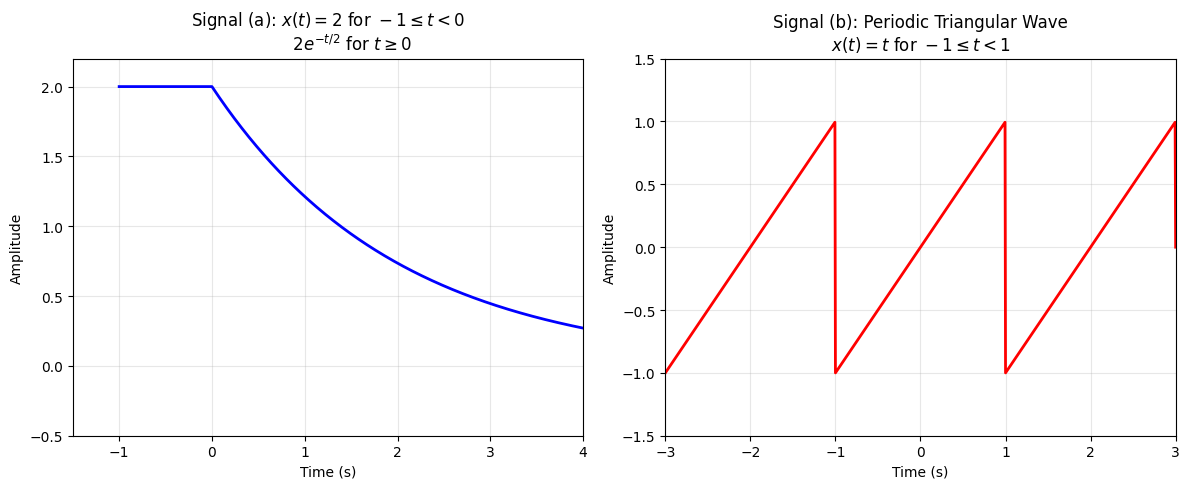


Signal (a) Metrics (Energy Signal):
Total Energy: 8.0000 J (Analytic)
Numerical Energy: 7.9999 J


Signal (b) Metrics (Power Signal):
Average Power: 0.3333 W
RMS Value: 0.5774 (1/√3 ≈ 0.5774)
Numerical Verification:
- Power over 1 period: 0.3330 W
- RMS: 0.5771



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ================================================
# Signal (a): x(t) = 2 (for -1 ≤ t < 0), 2e^{-t/2} (for t ≥ 0)
# ================================================
t1 = np.linspace(-1, 0, 500)        # First segment (-1 to 0)
x1 = np.full_like(t1, 2)            # Constant 2

t2 = np.linspace(0, 10, 1000)       # Approximate infinity with 10 seconds
x2 = 2 * np.exp(-t2/2)              # Exponential decay

t_a = np.concatenate((t1, t2))
x_a = np.concatenate((x1, x2))

# Energy calculation (matches example)
energy_a = 4*(0 - (-1)) + 4*(1 - 0)  # Analytic result = 8

# ================================================
# Signal (b): Periodic triangular wave x(t) = t (for -1 ≤ t < 1), period=2
# ================================================
t_b = np.linspace(-3, 3, 1000)      # Show 3 periods for visualization
x_b = np.zeros_like(t_b)

for n in [-1, 0, 1]:                # Create periodic signal
    period_mask = (t_b >= (-1 + 2*n)) & (t_b < (1 + 2*n))
    x_b[period_mask] = t_b[period_mask] - 2*n

# Power and RMS calculation (matches example)
P_x = 1/3                          # From example calculation
rms_b = np.sqrt(P_x)               # 1/√3 ≈ 0.5774

# ================================================
# Plotting
# ================================================
plt.figure(figsize=(12, 5))

# Plot Signal (a)
plt.subplot(1, 2, 1)
plt.plot(t_a, x_a, 'b', linewidth=2)
plt.title('Signal (a): $x(t) = 2\\ \\text{for}\\ -1 \\leq t < 0$\n$\\ \\ \\ \\ \\ \\ \\ \\ \\ 2e^{-t/2}\\ \\text{for}\\ t \\geq 0$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(-1.5, 4)
plt.ylim(-0.5, 2.2)

# Plot Signal (b)
plt.subplot(1, 2, 2)
plt.plot(t_b, x_b, 'r', linewidth=2)
plt.title('Signal (b): Periodic Triangular Wave\n$x(t) = t\\ \\text{for}\\ -1 \\leq t < 1$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(-3, 3)
plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()


# ================================================
# Print Metrics
# ================================================
print(f'''
=============================================
Signal (a) Metrics (Energy Signal):
=============================================
Total Energy: {energy_a:.4f} J (Analytic)
Numerical Energy: {np.trapz(x_a**2, t_a):.4f} J
''')

print(f'''
=============================================
Signal (b) Metrics (Power Signal):
=============================================
Average Power: {P_x:.4f} W
RMS Value: {rms_b:.4f} (1/√3 ≈ 0.5774)
Numerical Verification:
- Power over 1 period: {np.mean(x_b**2):.4f} W
- RMS: {np.sqrt(np.mean(x_b**2)):.4f}
''')

## Exemplo 2.7

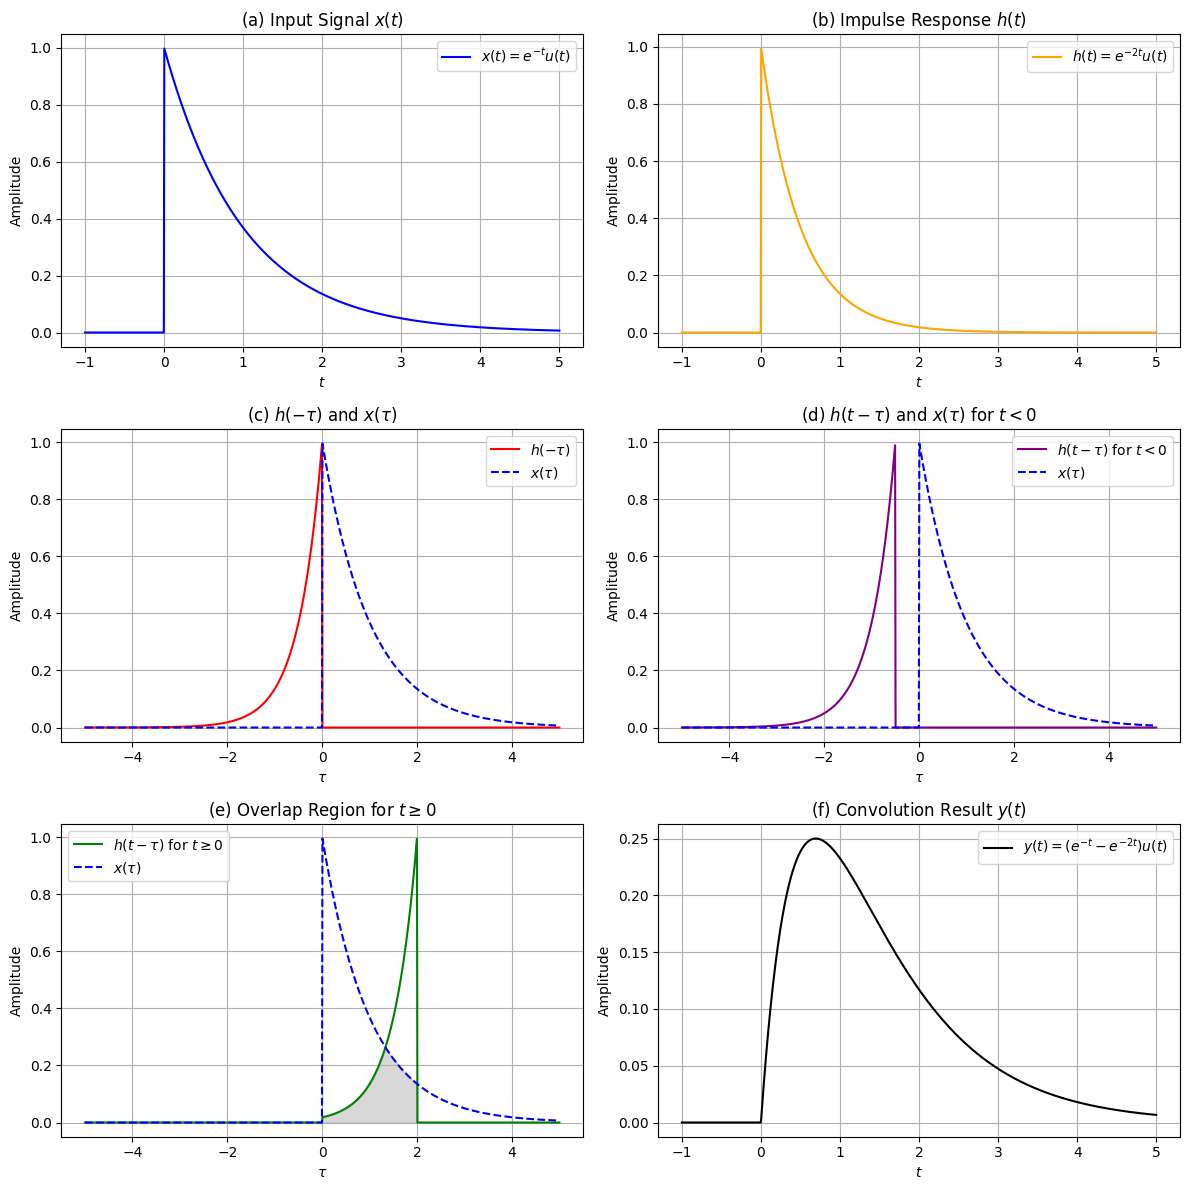

In [ ]:
t = np.linspace(-1, 5, 1000)

# Define signals x(t) and h(t)
x = np.where(t >= 0, np.exp(-t), 0)  # x(t) = e^{-t}u(t)
h = np.where(t >= 0, np.exp(-2*t), 0)  # h(t) = e^{-2t}u(t)

# Analytical convolution result
y_analytical = np.where(t >= 0, np.exp(-t) - np.exp(-2*t), 0)  # y(t) = (e^{-t} - e^{-2t})u(t)

# Create subplots for all figures (a) to (f)
fig = plt.figure(figsize=(12, 12))

# Subplot 1: x(t) [Fig. 2.8a]
ax1 = plt.subplot(3, 2, 1)
ax1.plot(t, x, label='$x(t) = e^{-t}u(t)$', color='blue')
ax1.set_title('(a) Input Signal $x(t)$')
ax1.set_xlabel('$t$')
ax1.set_ylabel('Amplitude')
ax1.grid(True)
ax1.legend()

# Subplot 2: h(t) [Fig. 2.8b]
ax2 = plt.subplot(3, 2, 2)
ax2.plot(t, h, label='$h(t) = e^{-2t}u(t)$', color='orange')
ax2.set_title('(b) Impulse Response $h(t)$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('Amplitude')
ax2.grid(True)
ax2.legend()

# Subplot 3: h(-τ) and x(τ) [Fig. 2.8c]
tau = np.linspace(-5, 5, 1000)
h_flipped = np.where(tau <= 0, np.exp(2*tau), 0)  # h(-τ) = e^{2τ}u(-τ)
x_tau = np.where(tau >= 0, np.exp(-tau), 0)  # x(τ) = e^{-τ}u(τ)

ax3 = plt.subplot(3, 2, 3)
ax3.plot(tau, h_flipped, label='$h(-\\tau)$', color='red')
ax3.plot(tau, x_tau, label='$x(\\tau)$', color='blue', linestyle='--')
ax3.set_title('(c) $h(-\\tau)$ and $x(\\tau)$')
ax3.set_xlabel('$\\tau$')
ax3.set_ylabel('Amplitude')
ax3.grid(True)
ax3.legend()

# Subplot 4: h(t-τ) for t < 0 [Fig. 2.8d]
t_negative = -0.5  # Example t < 0
h_shifted_neg = np.where(tau <= t_negative, np.exp(2*(tau - t_negative)), 0)  # h(t-τ) for t < 0

ax4 = plt.subplot(3, 2, 4)
ax4.plot(tau, h_shifted_neg, label='$h(t-\\tau)$ for $t < 0$', color='purple')
ax4.plot(tau, x_tau, label='$x(\\tau)$', color='blue', linestyle='--')
ax4.set_title('(d) $h(t-\\tau)$ and $x(\\tau)$ for $t < 0$')
ax4.set_xlabel('$\\tau$')
ax4.set_ylabel('Amplitude')
ax4.grid(True)
ax4.legend()

# Subplot 5: h(t-τ) for t >= 0 [Fig. 2.8e]
t_positive = 2.0  # Example t >= 0
h_shifted_pos = np.where((tau >= 0) & (tau <= t_positive), np.exp(-2*(t_positive - tau)), 0)  # h(t-τ) for t >= 0

ax5 = plt.subplot(3, 2, 5)
ax5.plot(tau, h_shifted_pos, label='$h(t-\\tau)$ for $t \geq 0$', color='green')
ax5.plot(tau, x_tau, label='$x(\\tau)$', color='blue', linestyle='--')
ax5.fill_between(tau, 0, np.minimum(h_shifted_pos, x_tau), where=(tau >= 0) & (tau <= t_positive), alpha=0.3, color='gray')
ax5.set_title('(e) Overlap Region for $t \geq 0$')
ax5.set_xlabel('$\\tau$')
ax5.set_ylabel('Amplitude')
ax5.grid(True)
ax5.legend()

# Subplot 6: y(t) [Fig. 2.8f]
ax6 = plt.subplot(3, 2, 6)
ax6.plot(t, y_analytical, label='$y(t) = (e^{-t} - e^{-2t})u(t)$', color='black')
ax6.set_title('(f) Convolution Result $y(t)$')
ax6.set_xlabel('$t$')
ax6.set_ylabel('Amplitude')
ax6.grid(True)
ax6.legend()

plt.tight_layout()
plt.show()

## Exemplo 3.14

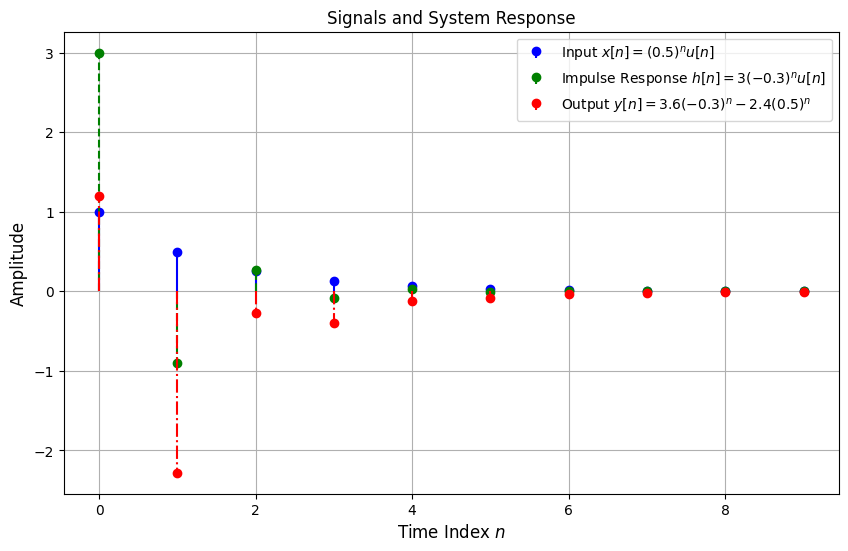

In [ ]:
# Define time indices
time_indices = np.arange(0, 10)

# Input signal x[n] = (0.5)^n u[n]
input_signal = (0.5)**time_indices

# Impulse response h[n] = 3(-0.3)^n u[n]
impulse_response = 3*(-0.3)**time_indices

# Output signal y[n] = 3.6(-0.3)^n - 2.4(0.5)^n
output_signal = 3.6*(-0.3)**time_indices - 2.4*(0.5)**time_indices

# Plot signals
plt.figure(figsize=(10, 6))

# Plot input signal
plt.stem(time_indices, input_signal, linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Input $x[n] = (0.5)^n u[n]$')

# Plot impulse response
plt.stem(time_indices, impulse_response, linefmt='g--', markerfmt='go', basefmt=' ',
         label='Impulse Response $h[n] = 3(-0.3)^n u[n]$')

# Plot output signal
plt.stem(time_indices, output_signal, linefmt='r-.', markerfmt='ro', basefmt=' ',
         label='Output $y[n] = 3.6(-0.3)^n - 2.4(0.5)^n$')

plt.xlabel('Time Index $n$', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Signals and System Response')
plt.legend()
plt.grid(True)
plt.show()

## Exemplo 4.18

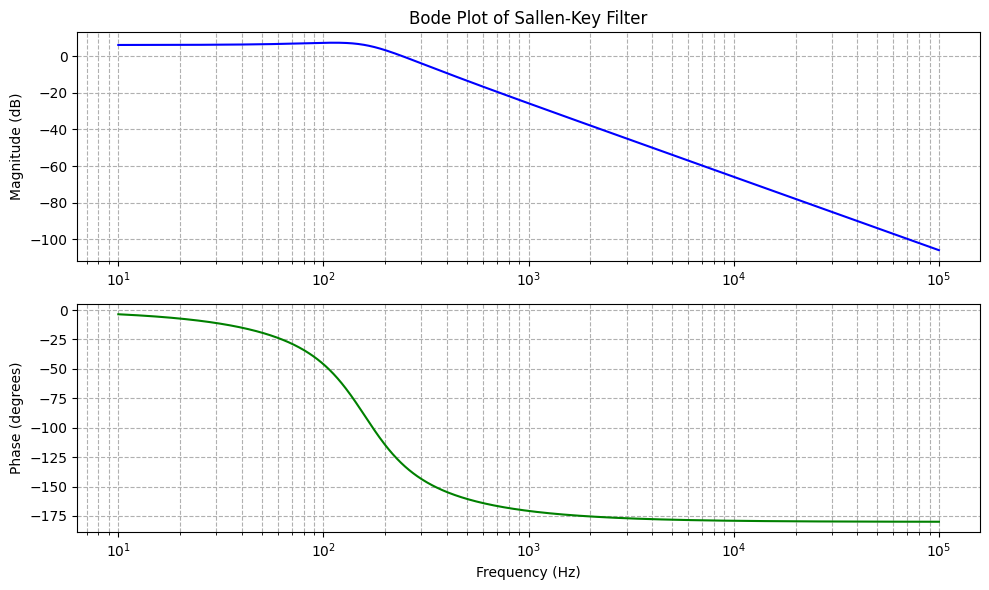

In [ ]:
from sympy import symbols, Matrix, simplify, lambdify

# Define symbolic variables with descriptive names
s = symbols('s')
resistor_1 = symbols('resistor_1', positive=True)
resistor_2 = symbols('resistor_2', positive=True)
capacitor_1 = symbols('capacitor_1', positive=True)
capacitor_2 = symbols('capacitor_2', positive=True)
resistor_a = symbols('resistor_a', positive=True)
resistor_b = symbols('resistor_b', positive=True)
input_voltage = symbols('input_voltage')

# Amplifier gain (K)
amplifier_gain = 1 + resistor_b / resistor_a

# Conductances
conductance_1 = 1 / resistor_1
conductance_2 = 1 / resistor_2

# Nodal analysis matrix
matrix_A = Matrix([
    [
        conductance_1 + conductance_2 + capacitor_1*s,
        -(conductance_2 + amplifier_gain*capacitor_1*s)
    ],
    [
        -conductance_2,
        conductance_2 + capacitor_2*s
    ]
])
vector_B = Matrix([conductance_1*input_voltage, 0])

# Compute determinants for Cramer's Rule
det_matrix_A = matrix_A.det()

# Replace column for V_b calculation
matrix_A_vb = matrix_A.copy()
matrix_A_vb[:, 1] = vector_B
det_num_vb = matrix_A_vb.det()

# Solve for V_b(s)/V_i(s)
Vb_over_Vi = (det_num_vb / det_matrix_A).simplify() / input_voltage

# Transfer function H(s) = K * V_b(s)/V_i(s)
transfer_function = amplifier_gain * Vb_over_Vi
transfer_function_simplified = simplify(transfer_function)

# Component values (example values)
component_values = {
    resistor_1: 1e3,    # 1 kΩ
    resistor_2: 1e3,    # 1 kΩ
    capacitor_1: 1e-6,  # 1 μF
    capacitor_2: 1e-6,  # 1 μF
    resistor_a: 1e3,     # 1 kΩ
    resistor_b: 1e3      # 1 kΩ
}

transfer_function_substituted = transfer_function_simplified.subs(component_values)

# Convert to numerical function
H_numeric = lambdify(s, transfer_function_substituted, 'numpy')

# Frequency range (10 Hz to 100 kHz)
frequency = np.logspace(1, 5, 1000)
omega_values = 2 * np.pi * frequency
s_values = 1j * omega_values  # s = jω

# Evaluate frequency response
H_values = H_numeric(s_values)

# Compute magnitude (dB) and phase (degrees)
magnitude_dB = 20 * np.log10(np.abs(H_values))
phase_degrees = np.angle(H_values, deg=True)

# Plot Bode diagram
plt.figure(figsize=(10, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(frequency, magnitude_dB, color='blue')
plt.title('Bode Plot of Sallen-Key Filter')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', linestyle='--')

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(frequency, phase_degrees, color='green')
plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (Hz)')
plt.grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.show()

## Exemplo 6.9

DC component: 0.6366 (Theoretical 2/π ≈ 0.6366)
Ripple RMS: 0.0496 (Theoretical 0.05)


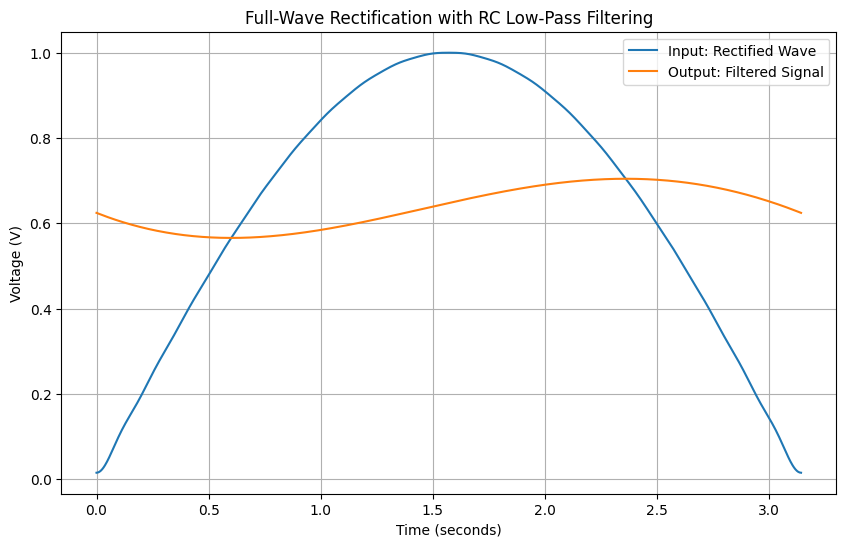

In [ ]:
# Simulation parameters
num_harmonics = 20  # Number of harmonics to consider
time_points = np.linspace(0, np.pi, 1000)  # Time array from 0 to π

# Compute full-wave rectified signal using Fourier series
def compute_rectified_signal(time_array, num_harmonics):
    rectified_signal = np.zeros_like(time_array, dtype=complex)
    for harmonic_index in range(-num_harmonics, num_harmonics + 1):
        fourier_coeff_input = 2 / (np.pi * (1 - 4 * harmonic_index**2))
        complex_exponential = np.exp(1j * 2 * harmonic_index * time_array)
        rectified_signal += fourier_coeff_input * complex_exponential
    return rectified_signal.real

# Compute filtered output using system transfer function
def compute_filtered_output(time_array, num_harmonics):
    filtered_signal = np.zeros_like(time_array, dtype=complex)
    for harmonic_index in range(-num_harmonics, num_harmonics + 1):
        fourier_coeff_input = 2 / (np.pi * (1 - 4 * harmonic_index**2))
        transfer_function = 1 / (1 + 6j * harmonic_index)
        harmonic_component = fourier_coeff_input * transfer_function * np.exp(1j * 2 * harmonic_index * time_array)
        filtered_signal += harmonic_component
    return filtered_signal.real

# Generate signals
rectified_waveform = compute_rectified_signal(time_points, num_harmonics)
filtered_waveform = compute_filtered_output(time_points, num_harmonics)

# Calculate DC component and ripple characteristics
dc_component = np.mean(filtered_waveform)
ripple_component = filtered_waveform - dc_component
ripple_rms = np.sqrt(np.mean(ripple_component**2))

# Display results
print(f"DC component: {dc_component:.4f} (Theoretical 2/π ≈ {2/np.pi:.4f})")
print(f"Ripple RMS: {ripple_rms:.4f} (Theoretical 0.05)")

# Create visualization
plt.figure(figsize=(10, 6))
plt.plot(time_points, rectified_waveform, label='Input: Rectified Wave')
plt.plot(time_points, filtered_waveform, label='Output: Filtered Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title('Full-Wave Rectification with RC Low-Pass Filtering')
plt.legend()
plt.grid(True)
plt.show()

## Exemplo 7.18

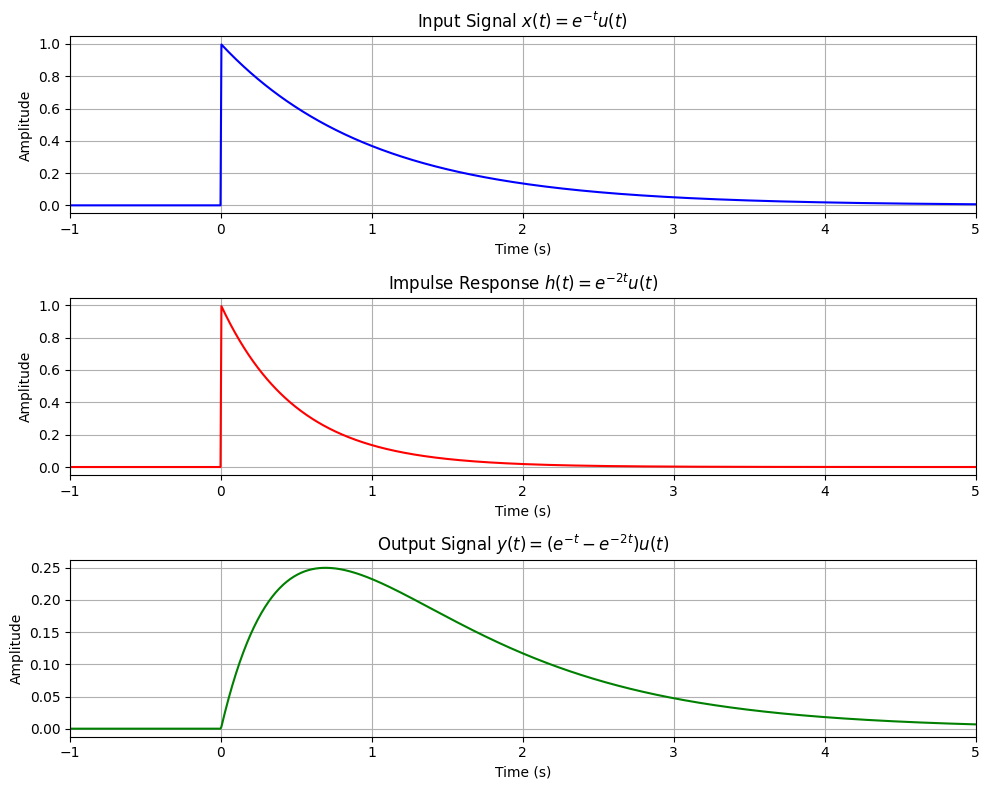

In [ ]:
# Time axis
time = np.linspace(-1, 5, 1000)

# Input signal input_signal(t) = e^(-t) u(t)
input_signal = np.exp(-time) * (time >= 0)

# Impulse response impulse_response(t) = e^(-2t) u(t)
impulse_response = np.exp(-2 * time) * (time >= 0)

# Output signal output_signal(t) = (e^(-t) - e^(-2t)) u(t)
output_signal = (np.exp(-time) - np.exp(-2 * time)) * (time >= 0)

# Plotting
plt.figure(figsize=(10, 8))

# Input signal
plt.subplot(3, 1, 1)
plt.plot(time, input_signal, 'b')
plt.title('Input Signal $x(t) = e^{-t}u(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-1, 5)

# Impulse response
plt.subplot(3, 1, 2)
plt.plot(time, impulse_response, 'r')
plt.title('Impulse Response $h(t) = e^{-2t}u(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-1, 5)

# Output signal
plt.subplot(3, 1, 3)
plt.plot(time, output_signal, 'g')
plt.title('Output Signal $y(t) = (e^{-t} - e^{-2t})u(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(-1, 5)

plt.tight_layout()
plt.show()